In [5]:
import re
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter

In [6]:
firstdata = pd.read_csv("final_01.csv")

In [7]:
firstdata.count()

文章日期    29
標題      30
作者      27
新聞內容    30
dtype: int64

In [8]:
print("文章的實際總數為"+str(firstdata["標題"].count())+"篇")

文章的實際總數為30篇


In [9]:
firstdata["titleword"]=""
firstdata["articleword"]=""
firstdata.head

<bound method NDFrame.head of           文章日期                                           標題        作者  \
0     2022/7/5    真實鐵達尼號唯一日本倖存者，回國竟被痛罵懦夫、國恥！死後日記揭「真相」讓世人都沉默       連珮妤   
1   2018/11/12  鐵達尼號的真實故事：世界首富把救生船的位子讓給了三等艙的婦女，只為守護「保護弱者」原則       周慧心   
2    2022/4/11                  鐵達尼號真人真事　歌女戀富二代天人永隔　生還後終生不嫁       陳婉珺   
3   2021年12月7日                      《鐵達尼號》中相擁而逝的老夫婦 真實故事更催淚       張小清   
4    2014/4/14                       除了淒美愛情...你該知道的鐵達尼號10件事        阿咖   
5    2022/5/13         鐵達尼號真人真事｜窮歌女戀上富二代 甜蜜登船最終天人永隔 遺物揭深情回憶        RD   
6     2020/5/1               17位《鐵達尼號》真實人物　「只出現一幕的夫人」才是大英雄！      扒拉文史   
7     2020/9/5                           《鐵達尼號》，5個基於真實人物的角色   君君DIARY   
8   2021/12/12                         鐵達尼號上的真實故事 — 人性的6個抉擇   英倫是你的情人   
9   2021/12/12                             我們所不知道真實的鐵達尼號的故事      李剛看盤   
10   2020/8/27                     鐵達尼號：揭祕火遍全球的電影背後悲慘而真實的故事    學地理觀海洋   
11  2021/12/12                         鐵達尼號背後的真實故事:你所不知道的柔情      魔力視頻   
12    2021/2/7       

In [10]:
index = 0
for sentence in firstdata["標題"]:#取出表格中標題的內容
    doct_list=jieba.analyse.extract_tags(sentence,200)#挑出200個最重要的單詞
    firstdata["titleword"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1
firstdata["titleword"]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\paylung\AppData\Local\Temp\jieba.cache
Loading model cost 0.711 seconds.
Prefix dict has been built successfully.


0     [真實, 鐵達尼號, 存者, 回國, 國恥, 死後日記, 懦夫, 真相, 世人, 沉默, 唯...
1     [鐵達尼號, 真實, 讓給, 婦女, 只為, 守護, 保護, 原則, 救生船, 弱者, 首富...
2              [鐵達尼號, 戀富, 天人永隔, 還後終, 生不嫁, 真人真事, 歌女, 二代]
3                       [鐵達尼號, 中相, 擁而逝, 真實, 催淚, 老夫, 故事]
4                         [淒美愛情, ..., 鐵達尼號, 10, 除了, 知道]
5     [鐵達尼號, 戀上富, 最終, 天人永隔, 遺物, 回憶, 真人真事, 登船, 歌女, 二代...
6                    [17, 鐵達尼號, 真實, 出現, 一幕, 英雄, 夫人, 人物]
7                                [鐵達尼號, 個基, 真實, 角色, 人物]
8                                [鐵達尼號, 真實, 抉擇, 人性, 故事]
9                                [我們, 真實, 鐵達尼號, 故事, 知道]
10                  [鐵達尼號, 火遍, 電影, 背後悲, 慘而, 真實, 故事, 全球]
11                               [鐵達尼號, 真實, 柔情, 故事, 知道]
12                          [鐵達尼號, 真實, 女主角, 永不, 布朗, 夫人]
13               [鐵達尼號, 存者, 槍聲, 轟然, 瞬間, 哭喊, 逃生, 真相, 倒下]
14               [悲慟, 鐵達尼號, 倖存, 船長, 公開, 當年, 沉船, 真相, 唯一]
15           [鐵達尼號, 傳奇, 存者, 三遇, 海難, 死裡, 獲封, 逃生, 永不, 女士]
16              [鐵達尼號, 紀錄片, 存者, 記載, 經歷, 冰山, 信件, 曝光, 救援]
17                     [泰坦尼克, 號有, 名中國, 存者, 背後有, 

In [11]:
seconddata=firstdata[["標題","titleword"]]
seconddata

標題  \
0     真實鐵達尼號唯一日本倖存者，回國竟被痛罵懦夫、國恥！死後日記揭「真相」讓世人都沉默   
1   鐵達尼號的真實故事：世界首富把救生船的位子讓給了三等艙的婦女，只為守護「保護弱者」原則   
2                   鐵達尼號真人真事　歌女戀富二代天人永隔　生還後終生不嫁   
3                       《鐵達尼號》中相擁而逝的老夫婦 真實故事更催淚   
4                        除了淒美愛情...你該知道的鐵達尼號10件事   
5          鐵達尼號真人真事｜窮歌女戀上富二代 甜蜜登船最終天人永隔 遺物揭深情回憶   
6                17位《鐵達尼號》真實人物　「只出現一幕的夫人」才是大英雄！   
7                            《鐵達尼號》，5個基於真實人物的角色   
8                          鐵達尼號上的真實故事 — 人性的6個抉擇   
9                              我們所不知道真實的鐵達尼號的故事   
10                     鐵達尼號：揭祕火遍全球的電影背後悲慘而真實的故事   
11                         鐵達尼號背後的真實故事:你所不知道的柔情   
12                       「永不沉沒的布朗夫人」|鐵達尼號的真實女主角   
13                「鐵達尼號」倖存者逃生真相：哭喊聲、槍聲與船轟然倒下的瞬間   
14                  悲慟！鐵達尼號唯一倖存的副船長 公開當年的「沉船真相」   
15               【鐵達尼號】傳奇倖存者三遇海難仍死裡逃生　獲封永不沉沒的女士   
16               【鐵達尼號】紀錄片揭倖存者從未曝光信件　記載撞冰山後救援經歷   
17                   「泰坦尼克」號有6名中國倖存者 背後有段很醜陋的故事   
18                   電影裡都是假的！歷史上鐵達尼號真實故事本沒有那麼美好   
19                 泰坦尼克號上竟然有8名中國人！他們是誰？他們的命運如何？   
20          泰坦尼克号电影之外的真实故事丨当船开始下沉，你知道人们在呼喊什么吗？    
21                比利時婦自稱鐵達尼號生還者 離世後真相曝光竟藏淒美愛情故事   
22                       今日係......鐵達尼號最後一名生還者死忌   
23                鐵達尼號最後一位倖存者的遺言被世人流傳 重要的「人生課程」   
24                               蒙冤百年　鐵達尼六華工獲正名   
25                                 一位鐵達尼號生還者的回憶   
26                                  鐵達尼號倖存者及其現狀   
27                               鐵達尼最後生還者　99歲辭世   
28                       鐵達尼號沉沒逾1500人遇難　最後救起一華人   
29                           愛永不沉沒 泰坦尼克的巨富們感動後世   

                                            titleword  
0   [真實, 鐵達尼號, 存者, 回國, 國恥, 死後日記, 懦夫, 真相, 世人, 沉默, 唯...  
1   [鐵達尼號, 真實, 讓給, 婦女, 只為, 守護, 保護, 原則, 救生船, 弱者, 首富...  
2            [鐵達尼號, 戀富, 天人永隔, 還後終, 生不嫁, 真人真事, 歌女, 二代]  
3                     [鐵達尼號, 中相, 擁而逝, 真實, 催淚, 老夫, 故事]  
4                       [淒美愛情, ..., 鐵達尼號, 10, 除了, 知道]  
5   [鐵達尼號, 戀上富, 最終, 天人永隔, 遺物, 回憶, 真人真事, 登船, 歌女, 二代...  
6                  [17, 鐵達尼號, 真實, 出現, 一幕, 英雄, 夫人, 人物]  
7                              [鐵達尼號, 個基, 真實, 角色, 人物]  
8                              [鐵達尼號, 真實, 抉擇, 人性, 故事]  
9                              [我們, 真實, 鐵達尼號, 故事, 知道]  
10                [鐵達尼號, 火遍, 電影, 背後悲, 慘而, 真實, 故事, 全球]  
11                             [鐵達尼號, 真實, 柔情, 故事, 知道]  
12                        [鐵達尼號, 真實, 女主角, 永不, 布朗, 夫人]  
13             [鐵達尼號, 存者, 槍聲, 轟然, 瞬間, 哭喊, 逃生, 真相, 倒下]  
14             [悲慟, 鐵達尼號, 倖存, 船長, 公開, 當年, 沉船, 真相, 唯一]  
15         [鐵達尼號, 傳奇, 存者, 三遇, 海難, 死裡, 獲封, 逃生, 永不, 女士]  
16            [鐵達尼號, 紀錄片, 存者, 記載, 經歷, 冰山, 信件, 曝光, 救援]  
17                   [泰坦尼克, 號有, 名中國, 存者, 背後有, 醜陋, 故事]  
18                    [電影裡, 歷史, 鐵達尼號, 真實, 那麼, 美好, 故事]  
19                    [他們, 泰坦尼克, 號上, 名中國, 命運, 竟然, 如何]  
20  [当船, 泰坦尼克号, 下沉, 呼喊, 电影, 真实, 故事, 之外, 人们, 知道, 开始...  
21  [時婦, 自稱, 鐵達尼號生, 還者, 離世, 竟藏, 淒美愛情, 比利, 真相, 曝光, 故事]  
22                        [......, 鐵達尼號, 生還者, 一名, 今日]  
23             [鐵達尼號, 存者, 遺言, 流傳, 課程, 世人, 人生, 一位, 重要]  
24                               [鐵達尼六華工, 蒙冤, 正名, 百年]  
25                                [鐵達尼號生, 還者, 回憶, 一位]  
26                                 [鐵達尼號, 存者, 現狀, 及其]  
27                             [鐵達尼, 最後生, 還者, 99, 辭世]  
28                          [鐵達尼號, 1500, 人遇, 一華人, 救起]  
29                           [泰坦尼克, 沉沒, 感動後世, 巨富, 永不]

In [12]:
seconddata.to_csv("final_02.csv",index=False) #將現有的資料存檔

In [13]:
jieba.load_userdict("final01_useword.txt") #將字補完整
jieba.analyse.set_stop_words("final01_noword.txt") #去除不重要的字，要放在同個資料夾
index = 0
for sentence in seconddata["標題"]:#取出表格中的內容
    doct_list=jieba.analyse.extract_tags(sentence,200)#挑出200個最重要的單詞
    seconddata["titleword"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中
    index += 1
seconddata["titleword"]

C:\Users\paylung\AppData\Local\Temp\ipykernel_1832\1077754952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seconddata["titleword"].iloc[index]=doct_list#將每個字句的重點單詞放在各個項目之中


0       [鐵達尼號, 倖存者, 回國, 國恥, 死後日記, 懦夫, 真相, 世人, 沉默, 日本]
1     [鐵達尼號, 婦女, 守護, 保護, 原則, 救生船, 弱者, 首富, 三等, 位子, 故事]
2               [鐵達尼號, 富二代, 天人永隔, 生還, 終生不嫁, 真人真事, 歌女]
3                         [鐵達尼號, 中相, 擁而逝, 催淚, 老夫, 故事]
4                                        [淒美愛情, 鐵達尼號]
5     [鐵達尼號, 富二代, 天人永隔, 遺物, 回憶, 真人真事, 登船, 歌女, 甜蜜, 深情]
6                              [鐵達尼號, 出現, 英雄, 夫人, 人物]
7                                      [鐵達尼號, 角色, 人物]
8                                  [鐵達尼號, 抉擇, 人性, 故事]
9                                          [鐵達尼號, 故事]
10                             [鐵達尼號, 火遍, 電影, 故事, 全球]
11                                     [鐵達尼號, 柔情, 故事]
12                                  [布朗夫人, 鐵達尼號, 女主角]
13                        [鐵達尼號, 倖存者, 槍聲, 哭喊, 逃生, 真相]
14                     [悲慟, 鐵達尼號, 倖存, 船長, 公開, 沉船, 真相]
15                        [鐵達尼號, 傳奇, 倖存者, 海難, 逃生, 女士]
16           [鐵達尼號, 紀錄片, 倖存者, 記載, 經歷, 冰山, 信件, 曝光, 救援]
17                            [泰坦尼克, 中國, 倖存者, 醜陋, 故事]
18                        [電

In [14]:
seconddata_list=seconddata['titleword'].tolist()
type(seconddata_list)

list

In [15]:
flat=[x for sublist in seconddata_list for x in sublist]#將所有清單進行整併
diction=Counter(flat)

In [172]:
diction_key=pd.DataFrame(diction.keys())
diction_value=pd.DataFrame(diction.values())
df=[diction_key,diction_value]
result=pd.concat(df,axis=1)#增加第一列
result.columns=["標題關鍵字","次數"]
result

標題關鍵字  次數
0     救生艇  25
1      細野   1
2      乘客  18
3      日本   3
4      甲板   8
..    ...  ..
275    全長   1
276    標準   1
277    動力   1
278    馬力   1
279  北大西洋   1

[280 rows x 2 columns]

In [173]:
bigger3 = result[(result["次數"]>2)].sort_values(by=["次數"])#做排序的方式
bigger3

標題關鍵字  次數
228    哥哥   3
74    救生船   3
68    大西洋   3
66     船難   3
44     遺物   3
40     家人   3
30     海水   3
28     百貨   3
100    屍體   3
89     布朗   3
24    史密斯   3
26    愛德華   3
98     莫莉   3
3      日本   3
142    時候   3
6      郵輪   3
111    社會   3
138   羅莎莉   3
88     白星   4
167    海難   4
33     親人   4
134    女人   4
140    小艇   5
153    父親   5
21   泰坦尼克   5
56     丈夫   5
106    兒童   5
23     孩子   6
42    伊斯梅   6
12     人們   6
36     紐約   6
38     愛情   6
22     勞斯   6
58     歷史   8
4      甲板   8
31     災難   8
16     故事   9
20     母親   9
32     婦女  10
18     沉船  10
13     船長  11
27     船員  13
17     冰山  15
11     英國  15
7      美國  15
5      電影  15
2      乘客  18
0     救生艇  25

In [174]:
result["標題關鍵字"]

0       救生艇
1        細野
2        乘客
3        日本
4        甲板
       ... 
275      全長
276      標準
277      動力
278      馬力
279    北大西洋
Name: 標題關鍵字, Length: 280, dtype: object

In [175]:
type(result["標題關鍵字"].iloc[0])

str

In [176]:
result01_keyword=result["標題關鍵字"].tolist()
type(result01_keyword)

list

In [177]:
result01_keyword

['救生艇',
 '細野',
 '乘客',
 '日本',
 '甲板',
 '電影',
 '郵輪',
 '美國',
 '媒體',
 '懦夫',
 '國恥',
 '英國',
 '人們',
 '船長',
 '紳士',
 '遺體',
 '故事',
 '冰山',
 '沉船',
 '古根海姆',
 '母親',
 '泰坦尼克',
 '勞斯',
 '孩子',
 '史密斯',
 '船身',
 '愛德華',
 '船員',
 '百貨',
 '安德魯斯',
 '海水',
 '災難',
 '婦女',
 '親人',
 '電報員',
 '崗位',
 '紐約',
 '梅恩',
 '愛情',
 '愛人',
 '家人',
 '船票',
 '伊斯梅',
 '親友',
 '遺物',
 '戀情',
 '時光',
 '比利',
 '加拿大',
 '唱歌',
 '妹妹',
 '鞋盒',
 '伊西',
 '艾達',
 '夫婦',
 '女僕',
 '丈夫',
 '布雷特',
 '歷史',
 '客輪',
 '梅西',
 '伯德',
 '皮大衣',
 '加州人',
 '通訊',
 '羅德',
 '船難',
 '鉚釘',
 '大西洋',
 '票房',
 '人員',
 '鐵達尼',
 '無線',
 '紀錄',
 '救生船',
 '歌女',
 '運動員',
 '眷侶',
 '家長',
 '經歷',
 '深情',
 '主角',
 '富家女',
 '男女',
 '代名',
 '夢幻',
 '慘劇',
 '飾演',
 '白星',
 '布朗',
 '布魯斯',
 '古根漢',
 '妻子',
 '德布',
 '希斯',
 '劇情',
 '資深',
 '演員',
 '莫莉',
 '人物',
 '屍體',
 '航行',
 '董事',
 '卡梅隆',
 '巨片',
 '人類',
 '兒童',
 '南安',
 '碼頭',
 '樂隊',
 '婦幼',
 '社會',
 '數據',
 '船艙',
 '波普諾',
 '規範',
 '口號',
 '婦孺',
 '輪船',
 '機率',
 '故障',
 '人性',
 '國家',
 '階層',
 '影片',
 '救援船',
 '穿著',
 '聞名',
 '情片',
 '露絲',
 '歷時',
 '聲譽',
 '細節',
 '男人',
 '女人',
 '手槍',
 '時刻',
 '關鍵',
 '羅莎莉',
 

In [178]:
result01_keyword.remove('......')
result01_keyword

ValueError: list.remove(x): x not in list

In [179]:
#顯示出次數超過3的關鍵字排名(標題)
px.bar(bigger3, x="標題關鍵字", y="次數")

In [180]:
#文字云的套件
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [181]:
mask=np.array(Image.open("ntnu_icon.png"))#載入文字云的圖形與文字
font="C:\Windows\Fonts\MSJH.TTC"

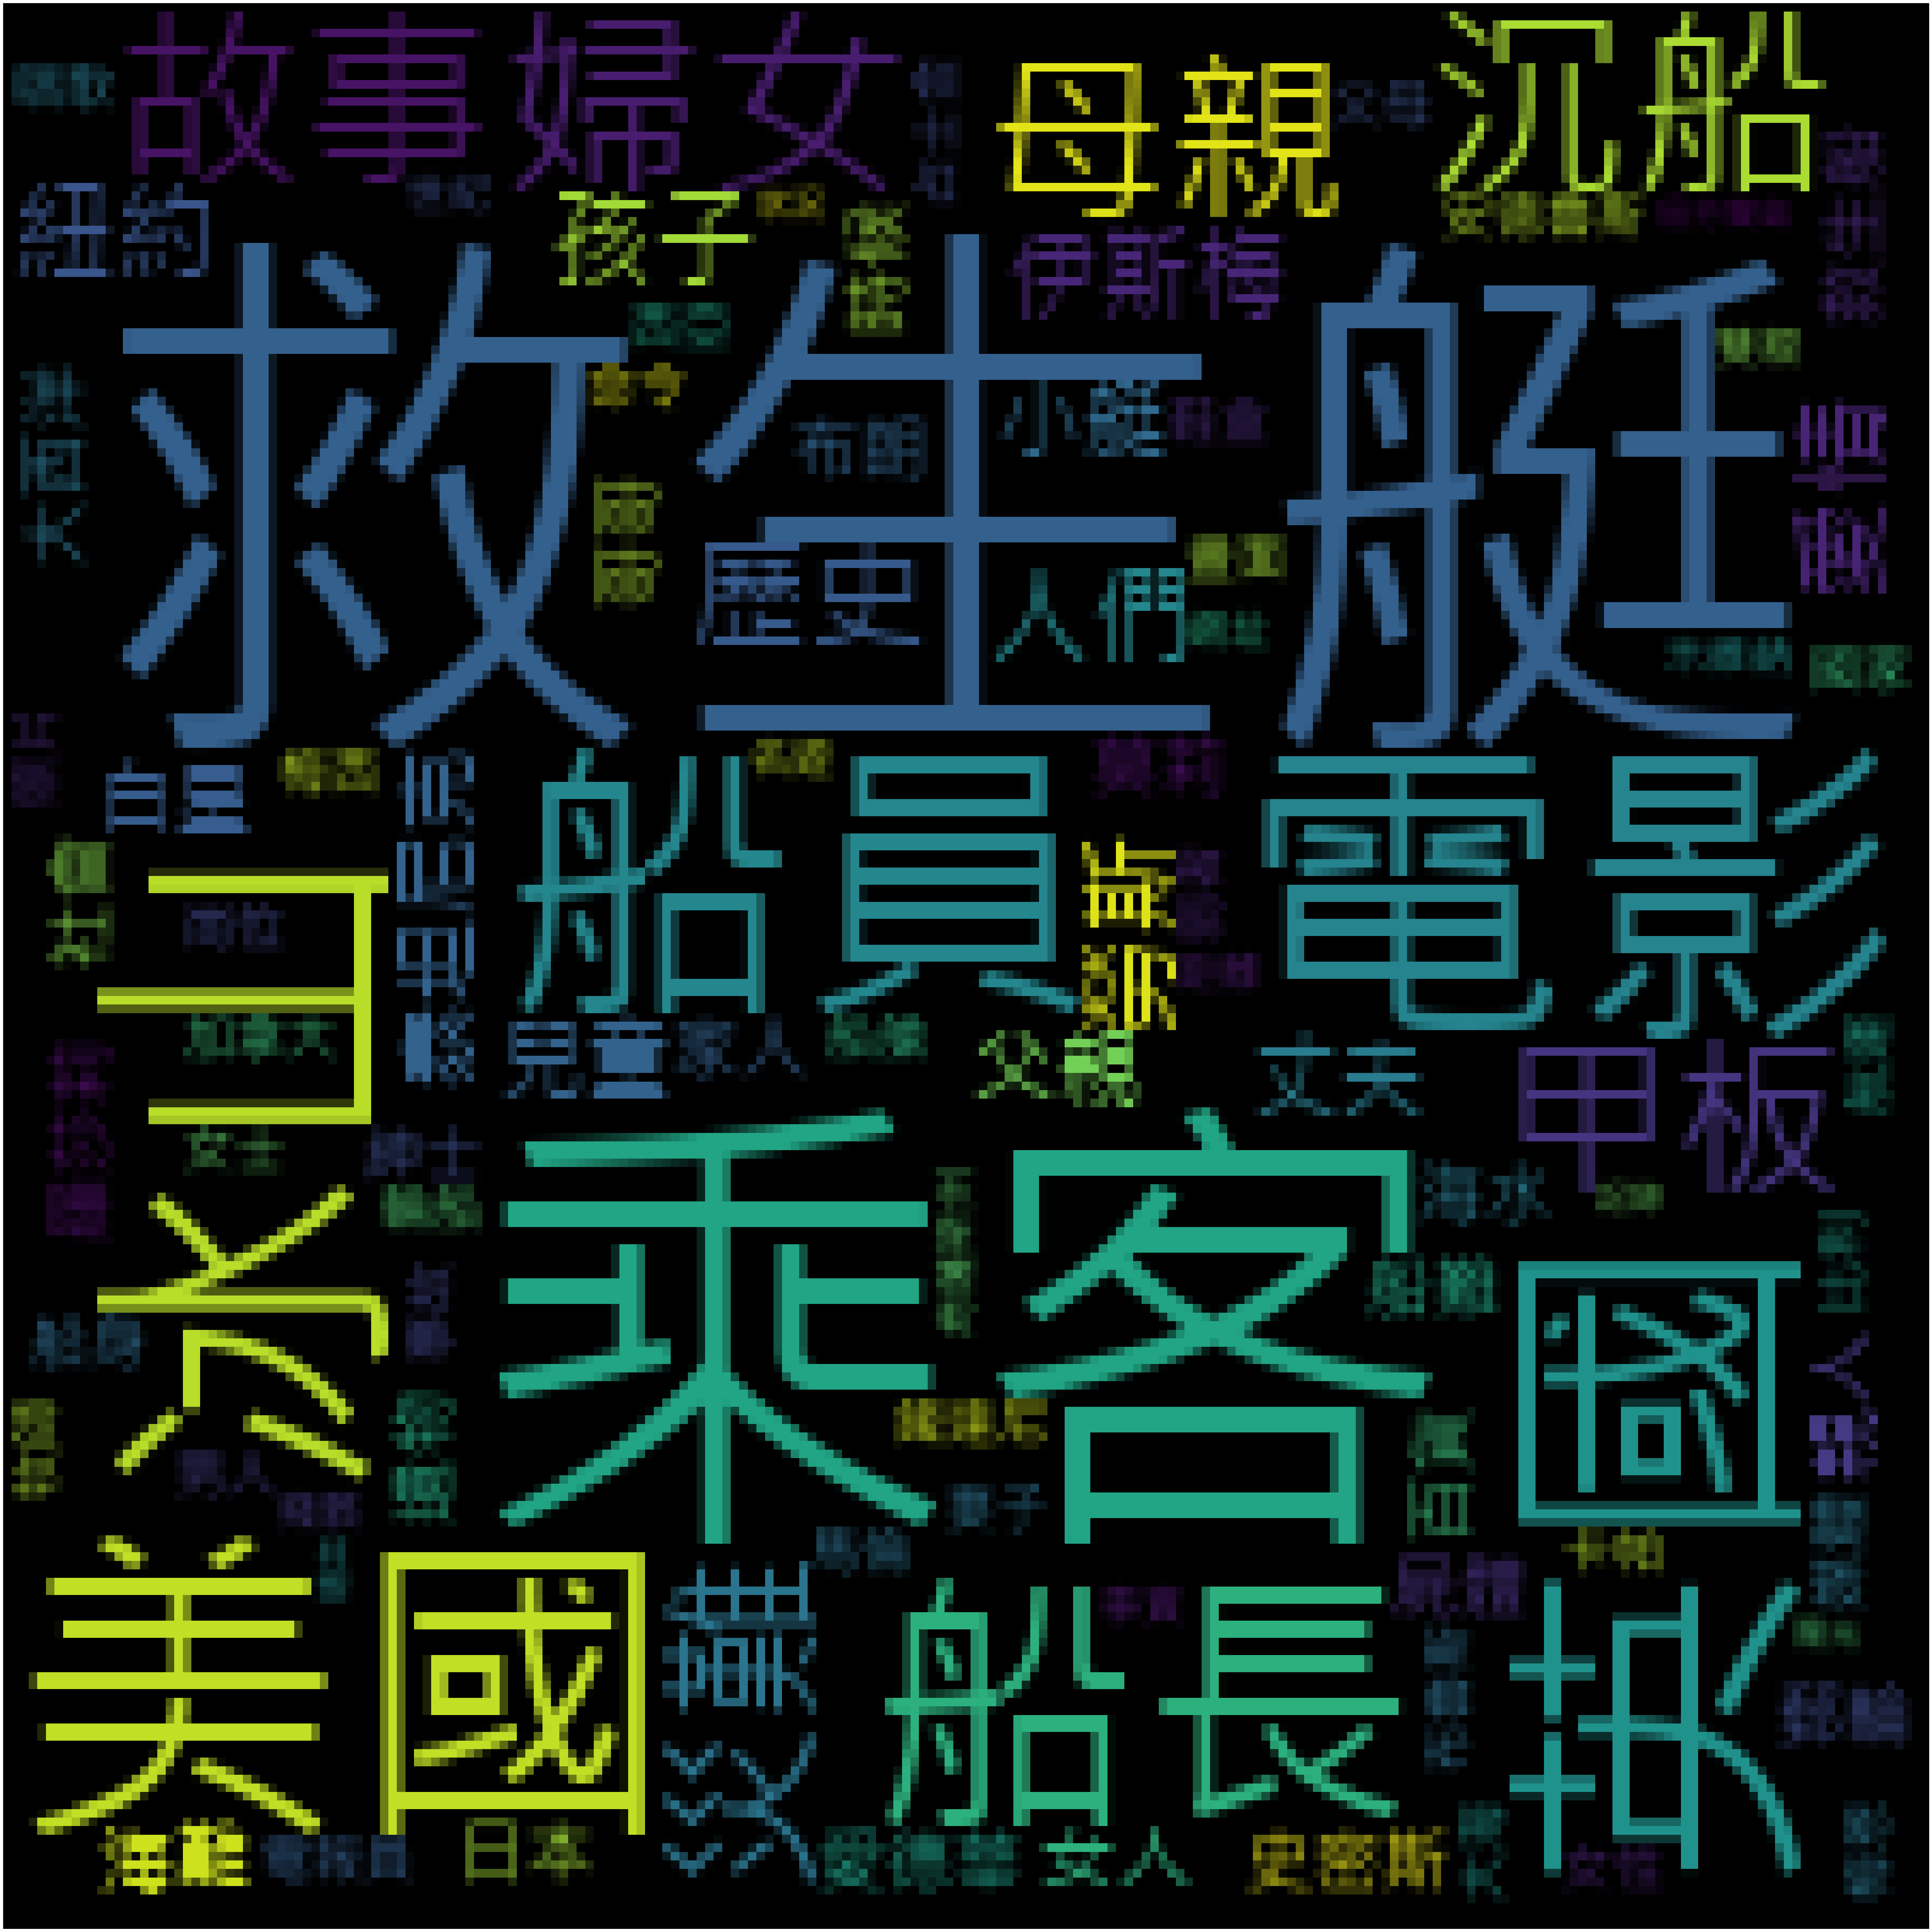

In [182]:
wordcloud=WordCloud(background_color="black",font_path=font,mask=mask)#設定背景顏色，字體與遮罩
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(80,80))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [183]:
type(result01_keyword)

list

In [184]:
mytitle=seconddata[["標題","titleword"]]
mytitle
mytitle["new"]=""#建立一個新欄位 放入隔開的；記得跑一次就好
index=0
for xs in mytitle["titleword"]:
    xs = mytitle['titleword'].iloc[index]
    temp = " ".join(str(x) for x in xs)
    mytitle['new'].iloc[index] = temp
    index += 1  
mytitle['new']

0       鐵達尼號 倖存者 回國 國恥 死後日記 懦夫 真相 世人 沉默 日本
1      鐵達尼號 婦女 守護 保護 原則 救生船 弱者 首富 三等 位子 故事
2            鐵達尼號 富二代 天人永隔 生還 終生不嫁 真人真事 歌女
3                     鐵達尼號 中相 擁而逝 催淚 老夫 故事
4                                淒美愛情 鐵達尼號
5     鐵達尼號 富二代 天人永隔 遺物 回憶 真人真事 登船 歌女 甜蜜 深情
6                         鐵達尼號 出現 英雄 夫人 人物
7                               鐵達尼號 角色 人物
8                            鐵達尼號 抉擇 人性 故事
9                                  鐵達尼號 故事
10                        鐵達尼號 火遍 電影 故事 全球
11                              鐵達尼號 柔情 故事
12                           布朗夫人 鐵達尼號 女主角
13                    鐵達尼號 倖存者 槍聲 哭喊 逃生 真相
14                  悲慟 鐵達尼號 倖存 船長 公開 沉船 真相
15                    鐵達尼號 傳奇 倖存者 海難 逃生 女士
16          鐵達尼號 紀錄片 倖存者 記載 經歷 冰山 信件 曝光 救援
17                       泰坦尼克 中國 倖存者 醜陋 故事
18                    電影裡 歷史 鐵達尼號 那麼 美好 故事
19                        他們 泰坦尼克 號上 中國 命運
20                    泰坦尼克号 下沉 呼喊 电影 真实 故事
21         比利時婦 自稱 鐵達尼號生還者 離世 真相曝光 淒美愛情 故事
22                         ...... 鐵達尼號 生還者
23         

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
#將資料出現次數
docs = mytitle["new"].tolist()
vec=CountVectorizer()
X=vec.fit_transform(docs)
df=pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



一華人  三等  下沉  世人  中國  中相  人性  人物  人生課程  他們  ...  醜陋  重要  鐵達尼  鐵達尼六華工  鐵達尼號  \
0     0   0   0   1   0   0   0   0     0   0  ...   0   0    0       0     1   
1     0   1   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
2     0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
3     0   0   0   0   0   1   0   0     0   0  ...   0   0    0       0     1   
4     0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
5     0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
6     0   0   0   0   0   0   0   1     0   0  ...   0   0    0       0     1   
7     0   0   0   0   0   0   0   1     0   0  ...   0   0    0       0     1   
8     0   0   0   0   0   0   1   0     0   0  ...   0   0    0       0     1   
9     0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
10    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
11    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
12    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
13    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
14    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
15    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
16    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
17    0   0   0   0   1   0   0   0     0   0  ...   1   0    0       0     0   
18    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
19    0   0   0   0   1   0   0   0     0   1  ...   0   0    0       0     0   
20    0   0   1   0   0   0   0   0     0   0  ...   0   0    0       0     0   
21    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     0   
22    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
23    0   0   0   1   0   0   0   0     1   0  ...   0   1    0       0     1   
24    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       1     0   
25    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     0   
26    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
27    0   0   0   0   0   0   0   0     0   0  ...   0   0    1       0     0   
28    1   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     1   
29    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0     0   

    鐵達尼號生還者  離世  電影  電影裡  首富  
0         0   0   0    0   0  
1         0   0   0    0   1  
2         0   0   0    0   0  
3         0   0   0    0   0  
4         0   0   0    0   0  
5         0   0   0    0   0  
6         0   0   0    0   0  
7         0   0   0    0   0  
8         0   0   0    0   0  
9         0   0   0    0   0  
10        0   0   1    0   0  
11        0   0   0    0   0  
12        0   0   0    0   0  
13        0   0   0    0   0  
14        0   0   0    0   0  
15        0   0   0    0   0  
16        0   0   0    0   0  
17        0   0   0    0   0  
18        0   0   0    1   0  
19        0   0   0    0   0  
20        0   0   0    0   0  
21        1   1   0    0   0  
22        0   0   0    0   0  
23        0   0   0    0   0  
24        0   0   0    0   0  
25        1   0   0    0   0  
26        0   0   0    0   0  
27        0   0   0    0   0  
28        0   0   0    0   0  
29        0   0   0    0   0  

[30 rows x 106 columns]

In [187]:
#矩陣轉置在相乘(矩陣)
coocc=df.T.dot(df)
coocc

一華人  三等  下沉  世人  中國  中相  人性  人物  人生課程  他們  ...  醜陋  重要  鐵達尼  鐵達尼六華工  \
一華人        1   0   0   0   0   0   0   0     0   0  ...   0   0    0       0   
三等         0   1   0   0   0   0   0   0     0   0  ...   0   0    0       0   
下沉         0   0   1   0   0   0   0   0     0   0  ...   0   0    0       0   
世人         0   0   0   2   0   0   0   0     1   0  ...   0   1    0       0   
中國         0   0   0   0   2   0   0   0     0   1  ...   1   0    0       0   
...      ...  ..  ..  ..  ..  ..  ..  ..   ...  ..  ...  ..  ..  ...     ...   
鐵達尼號生還者    0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0   
離世         0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0   
電影         0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0   
電影裡        0   0   0   0   0   0   0   0     0   0  ...   0   0    0       0   
首富         0   1   0   0   0   0   0   0     0   0  ...   0   0    0       0   

         鐵達尼號  鐵達尼號生還者  離世  電影  電影裡  首富  
一華人         1        0   0   0    0   0  
三等          1        0   0   0    0   1  
下沉          0        0   0   0    0   0  
世人          2        0   0   0    0   0  
中國          0        0   0   0    0   0  
...       ...      ...  ..  ..  ...  ..  
鐵達尼號生還者     0        2   1   0    0   0  
離世          0        1   1   0    0   0  
電影          1        0   0   1    0   0  
電影裡         1        0   0   0    1   0  
首富          1        0   0   0    0   1  

[106 rows x 106 columns]

In [188]:
import plotly.express as px
fig=px.imshow(coocc)
fig.layout.height=700
fig.layout.width=700
fig.show()

In [189]:
px.histogram(coocc)

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [190]:
import numpy as np

filter_number_up=2#特定次數以上
filter_number_down=20#特定次數以下
getid=coocc.index
important=pd.DataFrame(columns=getid).T
important["relation"]=""
subcoocc=coocc
dropid=[]

for i in range(len(coocc)):
    result=coocc[(coocc.iloc[i]>filter_number_up)&(coocc.iloc[i]<filter_number_down)].index.tolist()
    if(len(result)>0):
        important["relation"].loc[getid[i]]=coocc[(coocc.iloc[i]>filter_number_up)&(coocc.iloc[i]<filter_number_down)].index
        print(important["relation"].loc[getid[i]])
    else:
        dropid.append(i)
        important=important.drop([getid[i]])
        subcoocc=subcoocc.drop([getid[i]])

Index(['倖存者', '鐵達尼號'], dtype='object')
Index(['故事', '鐵達尼號'], dtype='object')
Index(['泰坦尼克'], dtype='object')
Index(['真相', '鐵達尼號'], dtype='object')
Index(['倖存者', '故事', '真相'], dtype='object')


In [191]:
subcoocc.drop(subcoocc.columns[dropid],axis=1,inplace=True)
subcoocc

倖存者  故事  泰坦尼克  真相  鐵達尼號
倖存者     7   1     1   2     6
故事      1  10     1   0     7
泰坦尼克    1   1     3   0     0
真相      2   0     0   3     3
鐵達尼號    6   7     0   3    22

In [192]:
fig=px.imshow(subcoocc)
fig.layout.height=700
fig.layout.width=700
fig.show()

In [193]:
#進行內容的文字分析
index=0
for sentence in firstdata["新聞內容"]:
    sentence = re.sub('\d+','',sentence)#re要記得先import，此為資料正則化的功能，去除掉不要的字
    sentence = re.sub('a-z','',sentence)
    doct_list=jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=('ns','nr','n'))#名詞顯示
    firstdata["articleword"].iloc[index]=doct_list
    index += 1

In [194]:
thirdata = firstdata[["新聞內容","articleword"]]

In [195]:
thirdata

新聞內容  \
0   20多年來，好萊塢電影《鐵達尼號》（Titanic、泰坦尼克號）中男女主角的動人故事，讓許多...   
1   1912年4月14日深夜，「不沉之船」——鐵達尼號（ Titanic）在北大西洋撞上冰山。2...   
2   今年是鐵達尼號沉沒110週年，明珠台昨晚（10日）重播由里安納度狄卡比奧（Leonardo ...   
3   人類歷史上發生過的天災人禍或許不計其數，但在當代人心中，上世紀初的「鐵達尼號」沉船事件尤其令...   
4   講到「發生在大船上的淒美愛情故事」時，相信九成九的人會不假思索說出《鐵達尼號》這個答案，儘管...   
5   1912年4月14日，一艘曾號稱永不沉沒的夢幻之船「鐵達尼號」因撞上冰山而沉沒，不少人從此失...   
6   相信大家一定都對經典電影《鐵達尼號》的畫面相當熟悉，無論是劇情、對白，甚至主題曲和角色都記得...   
7   災難巨片《鐵達尼號》是基於一個真實的故事，但並不是每個角色都是來自真實故事。1912年4月1...   
8   106年前的今天，即1912年4月10日，鐵達尼號在英國的南安普頓碼頭鳴笛起航，開始了她第一...   
9   100年前的4月，號稱「永不沉沒」的巨輪鐵達尼號開始了它的處女航。4月14日深夜，鐵達尼號撞...   
10  鐵達尼號是全球聞名，高成本大製作的一部災難愛情片，講述兩個主角傑克和露絲跨越階層的偉大的愛情...   
11  在第一艘救生艇下水後，我對甲板上一名姓斯特勞的女人說道：「你能隨我一起到那隻救生艇上去嗎？」...   
12  還記得《鐵達尼號》裡面由奧斯卡影后凱西·貝茨扮演的那個胖婦人嗎？露絲的媽媽輕蔑地稱她是「暴發...   
13  1912年4月14日深夜，當時世界上最巨大華美的船艦「鐵達尼號」（RMS Titanic），...   
14  大家都知道《鐵達尼號》中傑克和蘿絲的感人愛情故事，但你對鐵達尼號還有更深的認識嗎？它的背後究...   
15  由占士金馬倫（James Cameron）執導；里安納度狄卡比奧（Leonardo DiCa...   
16  由占士金馬倫（James Cameron）執導；里安納度狄卡比奧（Leonardo DiCa...   
17  真實的「泰坦尼克」號海難後，不但有悽美的愛情故事，還藏著醜陋的種族主義歧視。從昨天起，有個事...   
18  歷史上泰坦號，船身長達三幢半住宅大廈的長度，曾經被歐美新聞界譽為「海上城市」而且在世界航海史...   
19  大家還記得美國電影《泰坦尼克號》嗎？傑克和肉絲的愛情故事。1912年沈沒的那艘客輪泰坦尼克號...   
20  1912年4月14日那个恐怖的夜晚，泰坦尼克号上共有705人得救，1502人罹难。泰坦尼克号...   
21  浪漫程度不輸虛構的電影情節1997年上映，以「鐵達尼號沉沒事件」為背景的經典電影《鐵達尼號》...   
22  從事地圖繪製工作的Millvina Dean雖然只是英國一名公務員，但自從兩個月大時經歷了一...   
23  1912年4月14日的鐵達尼號沉船事件，至今已104年。那是鐵達尼號首航，載著超過2200名...   
24  1912年4月14日的鐵達尼號沉船事件，至今已104年。那是鐵達尼號首航，載著超過2200名...   
25  在1912年4月14日那個恐怖的夜晚，鐵達尼號上共有705人得救，1502人罹難。38歲的查...   
26  鐵達尼號倖存者鐵達尼號撞冰山沉沒之後，3點30分，卡納德公司的客船卡帕西亞號最先趕到了出事現...   
27  史上最慘痛的船難，鐵達尼號事故，最後一位居住在美國的生還者，阿斯普朗女士，6日在麻州的家中過...   
28  「鐵達尼號」是1912年建成的豪華郵輪，同年首航時卻發生沉船意外，造成逾1500人喪生，成為...   
29  1912年4月14日深夜，「不沉之船」——泰坦尼克號（也稱鐵達尼號，Titanic）在北大西...   

                                          articleword  
0   [救生艇, 細野, 乘客, 日本, 甲板, 電影, 郵輪, 美國, 媒體, 懦夫, 國恥, ...  
1   [救生艇, 船長, 母親, 泰坦尼克, 勞斯, 孩子, 史密斯, 船身, 愛德華, 船員, ...  
2   [梅恩, 救生艇, 愛情, 愛人, 母親, 家人, 船票, 伊斯梅, 親友, 遺物, 戀情,...  
3   [伊西, 救生艇, 艾達, 紐約, 電影, 夫婦, 女僕, 人們, 沉船, 丈夫, 布雷特,...  
4   [乘客, 加州人, 救生艇, 船員, 船長, 通訊, 羅德, 船難, 電影, 鉚釘, 冰山,...  
5   [歌女, 冰山, 電影, 愛情, 運動員, 眷侶, 家長, 災難, 經歷, 遺物, 故事, ...  
6   [飾演, 電影, 白星, 船難, 伊斯梅, 救生艇, 布朗, 冰山, 船長, 布魯斯, 美國...  
7   [救生艇, 乘客, 歷史, 人物, 災難, 安德魯斯, 沉船, 布朗, 伊斯梅, 故事, 布...  
8   [救生艇, 伊斯梅, 災難, 勞斯, 人們, 船員, 人類, 電影, 兒童, 妻子, 英國,...  
9   [兒童, 救生艇, 乘客, 婦女, 社會, 船員, 冰山, 美國, 數據, 紳士, 船艙, ...  
10  [冰山, 救生艇, 國家, 船艙, 階層, 歷史, 電影, 海水, 影片, 救援船, 故事,...  
11  [救生艇, 甲板, 母親, 孩子, 婦女, 百貨, 男人, 女人, 丈夫, 白星, 手槍, ...  
12  [美國, 丹佛, 布朗, 救生艇, 電影, 歷史, 社會, 時候, 莫莉, 婦女, 西亞, ...  
13  [救生艇, 船員, 小艇, 伊娃, 冰山, 英國, 布萊德, 船長, 香水, 人們, 卡柏菲...  
14  [救生艇, 船長, 婦女, 勞斯, 甲板, 沉船, 孩子, 丈夫, 電影, 船員, 災難, ...  
15  [女服, 務員, 英國, 郵輪, 救生艇, 母親, 航運, 白星, 護士, 學校, 船員, ...  
16  [救生艇, 父親, 乘客, 兒子, 電影, 小孩, 事故, 母親, 死路, 信件, 大海, ...  
17  [美國, 英國, 媒體, 救生艇, 泰坦尼克, 船員, 大利, 海難, 紐約, 電影, 薩克...  
18  [兒童, 乘客, 歷史, 婦女, 藝術, 資料, 電影, 救生艇, 航海, 泰坦, 故事, ...  
19  [泰坦尼克, 救生艇, 方朗, 英國, 美國, 時候, 船員, 船長, 台山, 冰山, 大西...  
20  [救生艇, 孩子, 甲板, 妇女, 沉船, 丈夫, 救生船, 八号, 母亲, 女人, 夫妇,...  
21  [梅恩, 救生艇, 愛情, 比利, 家人, 電影, 遊輪, 遺物, 故事, 唱歌, 伊斯梅,...  
22  [英國, 哥哥, 父親, 媽媽, 母親, 事地, 公務員, 高齡壽, 舉家, 美國, 肯薩斯...  
23  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...  
24  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...  
25  [救生艇, 婦女, 勞斯, 母親, 孩子, 親人, 甲板, 丈夫, 泰坦尼克, 災難, 船長...  
26  [救生艇, 婦女, 兒童, 伊斯梅, 船員, 美國, 社會, 乘客, 冰山, 西亞, 英國,...  
27  [普朗, 美國, 船難, 麻州, 鐵達尼, 英國, 母親, 女士, 事故, 沉船, 電影, ...  
28  [乘客, 船員, 英國, 冰山, 大西洋, 文章, 白星, 郵輪, 華人, 月題, 時候, ...  
29  [泰坦尼克, 救生艇, 船長, 勞斯, 母親, 人們, 災難, 親人, 沉船, 孩子, 史密...

In [196]:
thirdata.to_csv("final_03.csv",index=False) #將現有的資料存檔

In [197]:
keywordata = firstdata[["articleword"]]

In [198]:
keywordata

articleword
0   [救生艇, 細野, 乘客, 日本, 甲板, 電影, 郵輪, 美國, 媒體, 懦夫, 國恥, ...
1   [救生艇, 船長, 母親, 泰坦尼克, 勞斯, 孩子, 史密斯, 船身, 愛德華, 船員, ...
2   [梅恩, 救生艇, 愛情, 愛人, 母親, 家人, 船票, 伊斯梅, 親友, 遺物, 戀情,...
3   [伊西, 救生艇, 艾達, 紐約, 電影, 夫婦, 女僕, 人們, 沉船, 丈夫, 布雷特,...
4   [乘客, 加州人, 救生艇, 船員, 船長, 通訊, 羅德, 船難, 電影, 鉚釘, 冰山,...
5   [歌女, 冰山, 電影, 愛情, 運動員, 眷侶, 家長, 災難, 經歷, 遺物, 故事, ...
6   [飾演, 電影, 白星, 船難, 伊斯梅, 救生艇, 布朗, 冰山, 船長, 布魯斯, 美國...
7   [救生艇, 乘客, 歷史, 人物, 災難, 安德魯斯, 沉船, 布朗, 伊斯梅, 故事, 布...
8   [救生艇, 伊斯梅, 災難, 勞斯, 人們, 船員, 人類, 電影, 兒童, 妻子, 英國,...
9   [兒童, 救生艇, 乘客, 婦女, 社會, 船員, 冰山, 美國, 數據, 紳士, 船艙, ...
10  [冰山, 救生艇, 國家, 船艙, 階層, 歷史, 電影, 海水, 影片, 救援船, 故事,...
11  [救生艇, 甲板, 母親, 孩子, 婦女, 百貨, 男人, 女人, 丈夫, 白星, 手槍, ...
12  [美國, 丹佛, 布朗, 救生艇, 電影, 歷史, 社會, 時候, 莫莉, 婦女, 西亞, ...
13  [救生艇, 船員, 小艇, 伊娃, 冰山, 英國, 布萊德, 船長, 香水, 人們, 卡柏菲...
14  [救生艇, 船長, 婦女, 勞斯, 甲板, 沉船, 孩子, 丈夫, 電影, 船員, 災難, ...
15  [女服, 務員, 英國, 郵輪, 救生艇, 母親, 航運, 白星, 護士, 學校, 船員, ...
16  [救生艇, 父親, 乘客, 兒子, 電影, 小孩, 事故, 母親, 死路, 信件, 大海, ...
17  [美國, 英國, 媒體, 救生艇, 泰坦尼克, 船員, 大利, 海難, 紐約, 電影, 薩克...
18  [兒童, 乘客, 歷史, 婦女, 藝術, 資料, 電影, 救生艇, 航海, 泰坦, 故事, ...
19  [泰坦尼克, 救生艇, 方朗, 英國, 美國, 時候, 船員, 船長, 台山, 冰山, 大西...
20  [救生艇, 孩子, 甲板, 妇女, 沉船, 丈夫, 救生船, 八号, 母亲, 女人, 夫妇,...
21  [梅恩, 救生艇, 愛情, 比利, 家人, 電影, 遊輪, 遺物, 故事, 唱歌, 伊斯梅,...
22  [英國, 哥哥, 父親, 媽媽, 母親, 事地, 公務員, 高齡壽, 舉家, 美國, 肯薩斯...
23  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...
24  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...
25  [救生艇, 婦女, 勞斯, 母親, 孩子, 親人, 甲板, 丈夫, 泰坦尼克, 災難, 船長...
26  [救生艇, 婦女, 兒童, 伊斯梅, 船員, 美國, 社會, 乘客, 冰山, 西亞, 英國,...
27  [普朗, 美國, 船難, 麻州, 鐵達尼, 英國, 母親, 女士, 事故, 沉船, 電影, ...
28  [乘客, 船員, 英國, 冰山, 大西洋, 文章, 白星, 郵輪, 華人, 月題, 時候, ...
29  [泰坦尼克, 救生艇, 船長, 勞斯, 母親, 人們, 災難, 親人, 沉船, 孩子, 史密...

In [199]:
keywordata.to_csv("final_04.csv",index=False)

In [200]:
keywordata_seg_list=keywordata['articleword'].tolist()

In [201]:
keywordata_seg_list

[['救生艇',
  '細野',
  '乘客',
  '日本',
  '甲板',
  '電影',
  '郵輪',
  '美國',
  '媒體',
  '懦夫',
  '國恥',
  '英國',
  '人們',
  '船長',
  '紳士',
  '遺體',
  '故事',
  '冰山',
  '沉船',
  '古根海姆'],
 ['救生艇',
  '船長',
  '母親',
  '泰坦尼克',
  '勞斯',
  '孩子',
  '史密斯',
  '船身',
  '愛德華',
  '船員',
  '百貨',
  '安德魯斯',
  '甲板',
  '海水',
  '災難',
  '婦女',
  '親人',
  '電報員',
  '崗位',
  '紐約'],
 ['梅恩',
  '救生艇',
  '愛情',
  '愛人',
  '母親',
  '家人',
  '船票',
  '伊斯梅',
  '親友',
  '遺物',
  '戀情',
  '時光',
  '船長',
  '比利',
  '加拿大',
  '唱歌',
  '乘客',
  '妹妹',
  '鞋盒',
  '故事'],
 ['伊西',
  '救生艇',
  '艾達',
  '紐約',
  '電影',
  '夫婦',
  '女僕',
  '人們',
  '沉船',
  '丈夫',
  '布雷特',
  '乘客',
  '歷史',
  '客輪',
  '愛情',
  '勞斯',
  '百貨',
  '梅西',
  '伯德',
  '皮大衣'],
 ['乘客',
  '加州人',
  '救生艇',
  '船員',
  '船長',
  '通訊',
  '羅德',
  '船難',
  '電影',
  '鉚釘',
  '冰山',
  '大西洋',
  '票房',
  '愛情',
  '人員',
  '鐵達尼',
  '無線',
  '英國',
  '紀錄',
  '救生船'],
 ['歌女',
  '冰山',
  '電影',
  '愛情',
  '運動員',
  '眷侶',
  '家長',
  '災難',
  '經歷',
  '遺物',
  '故事',
  '深情',
  '主角',
  '乘客',
  '家人',
  '富家女',
  '男女',
  '代名',
  '夢幻',
  '慘劇'],
 ['飾演',
  

In [246]:
flat=[x for sublist in keywordata_seg_list for x in sublist]#將所有清單進行整併
diction=Counter(flat)
diction_key=pd.DataFrame(diction.keys())
diction_value=pd.DataFrame(diction.values())
df=[diction_key,diction_value]
result=pd.concat(df,axis=1)#增加第一列
result.columns=["關鍵字","次數"]
result

關鍵字  次數
0     救生艇  25
1      細野   1
2      乘客  18
3      日本   3
4      甲板   8
..    ...  ..
275    全長   1
276    標準   1
277    動力   1
278    馬力   1
279  北大西洋   1

[280 rows x 2 columns]

In [248]:
type(result["關鍵字"].iloc[0])

str

In [250]:
type(result)
result["關鍵字"]
result["關鍵字"].to_csv("final_05.csv",index=False)

In [203]:
result.describe()

次數
count  280.000000
mean     2.142857
std      2.902406
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     25.000000

In [204]:
bigger5 = result[(result["次數"]>5)].sort_values(by=["次數"])#做排序的方式
bigger5

關鍵字  次數
38   愛情   6
36   紐約   6
12   人們   6
23   孩子   6
22   勞斯   6
42  伊斯梅   6
58   歷史   8
4    甲板   8
31   災難   8
16   故事   9
20   母親   9
32   婦女  10
18   沉船  10
13   船長  11
27   船員  13
11   英國  15
7    美國  15
5    電影  15
17   冰山  15
2    乘客  18
0   救生艇  25

In [205]:
type(bigger5)

pandas.core.frame.DataFrame

In [206]:
px.bar(bigger5, x="關鍵字", y="次數")

In [222]:
import plotly.graph_objects as go

In [224]:
fig=go.Figure(data=[go.Pie(labels=bigger5["關鍵字"],values=bigger5["次數"],hole=0.5)])
fig.update_layout(title_text="重大關鍵字",
annotations=[{
    "text":"關鍵字",
    "x":0.5,
    "y":0.5,
    "font_size":20,
    "showarrow":False
}])
fig.show()

In [207]:
#文字云的套件
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
mask=np.array(Image.open("titanicforword.jpg"))#載入文字云的圖形與文字
font="C:\Windows\Fonts\MSJH.TTC"

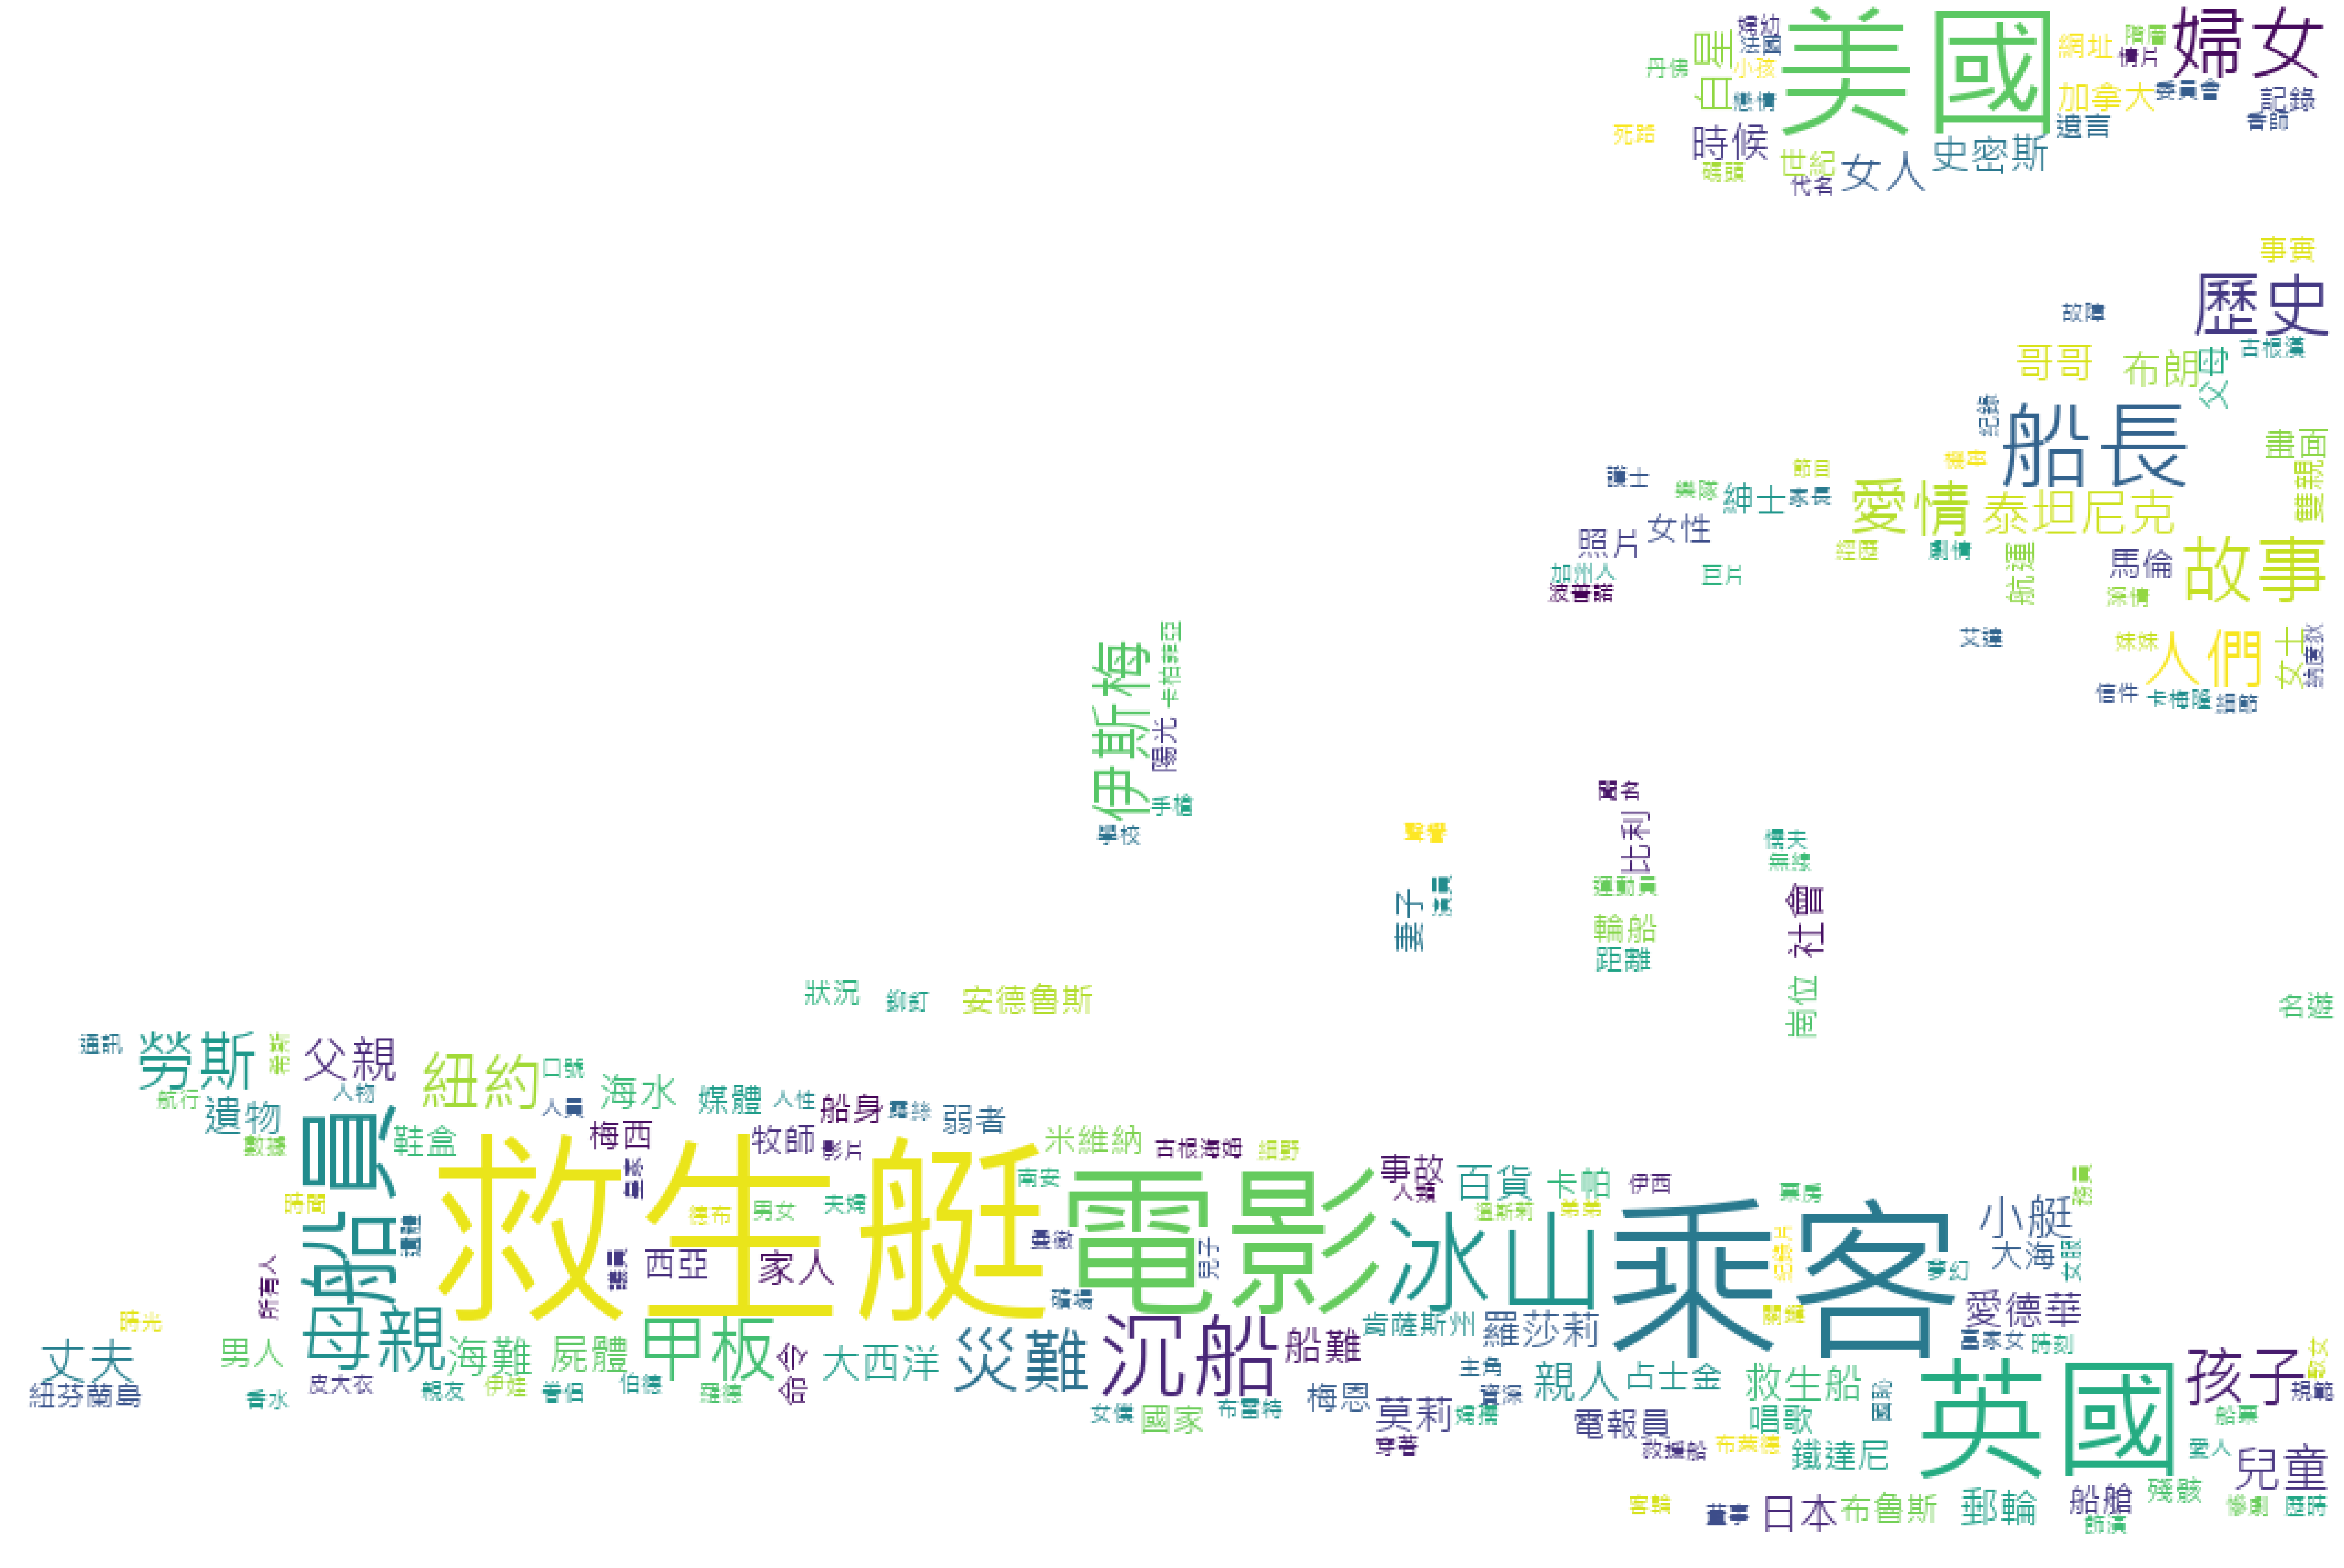

In [208]:
wordcloud=WordCloud(background_color="white",font_path=font,mask=mask)#設定背景顏色，字體與遮罩
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(60,60))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [209]:
keywordata["new"]=""#建立一個新欄位 放入隔開的；記得跑一次就好
index=0
for xs in keywordata["articleword"]:
    xs = keywordata['articleword'].iloc[index]
    temp = " ".join(str(x) for x in xs)
    keywordata['new'].iloc[index] = temp
    index += 1  
keywordata['new']

C:\Users\paylung\AppData\Local\Temp\ipykernel_1832\737232535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\paylung\AppData\Local\Temp\ipykernel_1832\737232535.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0     救生艇 細野 乘客 日本 甲板 電影 郵輪 美國 媒體 懦夫 國恥 英國 人們 船長 紳士 ...
1     救生艇 船長 母親 泰坦尼克 勞斯 孩子 史密斯 船身 愛德華 船員 百貨 安德魯斯 甲板 ...
2     梅恩 救生艇 愛情 愛人 母親 家人 船票 伊斯梅 親友 遺物 戀情 時光 船長 比利 加拿...
3     伊西 救生艇 艾達 紐約 電影 夫婦 女僕 人們 沉船 丈夫 布雷特 乘客 歷史 客輪 愛情...
4     乘客 加州人 救生艇 船員 船長 通訊 羅德 船難 電影 鉚釘 冰山 大西洋 票房 愛情 人...
5     歌女 冰山 電影 愛情 運動員 眷侶 家長 災難 經歷 遺物 故事 深情 主角 乘客 家人 ...
6     飾演 電影 白星 船難 伊斯梅 救生艇 布朗 冰山 船長 布魯斯 美國 古根漢 妻子 德布 ...
7     救生艇 乘客 歷史 人物 災難 安德魯斯 沉船 布朗 伊斯梅 故事 布魯斯 莫莉 愛德華 屍...
8     救生艇 伊斯梅 災難 勞斯 人們 船員 人類 電影 兒童 妻子 英國 婦女 沉船 甲板 南安...
9     兒童 救生艇 乘客 婦女 社會 船員 冰山 美國 數據 紳士 船艙 波普諾 規範 口號 婦孺...
10    冰山 救生艇 國家 船艙 階層 歷史 電影 海水 影片 救援船 故事 穿著 聞名 災難 情片...
11    救生艇 甲板 母親 孩子 婦女 百貨 男人 女人 丈夫 白星 手槍 親人 時刻 關鍵 紐約 ...
12    美國 丹佛 布朗 救生艇 電影 歷史 社會 時候 莫莉 婦女 西亞 委員會 卡帕 船員 礦場...
13    救生艇 船員 小艇 伊娃 冰山 英國 布萊德 船長 香水 人們 卡柏菲亞 父親 乘客 所有人...
14    救生艇 船長 婦女 勞斯 甲板 沉船 孩子 丈夫 電影 船員 災難 美國 羅莎莉 女人 小艇...
15    女服 務員 英國 郵輪 救生艇 母親 航運 白星 護士 學校 船員 海難 冰山 故事 乘客 ...
16    救生艇 父親 乘客 兒子 電影 小孩 事故 母親 死路 信件 大海 弟弟 父母 占士金 馬倫...
17    美國 英國 媒體 救生艇 泰坦尼克 船員 大利 海難 紐約 電影 薩克遜 英美 乘客

In [210]:
keywordata

articleword  \
0   [救生艇, 細野, 乘客, 日本, 甲板, 電影, 郵輪, 美國, 媒體, 懦夫, 國恥, ...   
1   [救生艇, 船長, 母親, 泰坦尼克, 勞斯, 孩子, 史密斯, 船身, 愛德華, 船員, ...   
2   [梅恩, 救生艇, 愛情, 愛人, 母親, 家人, 船票, 伊斯梅, 親友, 遺物, 戀情,...   
3   [伊西, 救生艇, 艾達, 紐約, 電影, 夫婦, 女僕, 人們, 沉船, 丈夫, 布雷特,...   
4   [乘客, 加州人, 救生艇, 船員, 船長, 通訊, 羅德, 船難, 電影, 鉚釘, 冰山,...   
5   [歌女, 冰山, 電影, 愛情, 運動員, 眷侶, 家長, 災難, 經歷, 遺物, 故事, ...   
6   [飾演, 電影, 白星, 船難, 伊斯梅, 救生艇, 布朗, 冰山, 船長, 布魯斯, 美國...   
7   [救生艇, 乘客, 歷史, 人物, 災難, 安德魯斯, 沉船, 布朗, 伊斯梅, 故事, 布...   
8   [救生艇, 伊斯梅, 災難, 勞斯, 人們, 船員, 人類, 電影, 兒童, 妻子, 英國,...   
9   [兒童, 救生艇, 乘客, 婦女, 社會, 船員, 冰山, 美國, 數據, 紳士, 船艙, ...   
10  [冰山, 救生艇, 國家, 船艙, 階層, 歷史, 電影, 海水, 影片, 救援船, 故事,...   
11  [救生艇, 甲板, 母親, 孩子, 婦女, 百貨, 男人, 女人, 丈夫, 白星, 手槍, ...   
12  [美國, 丹佛, 布朗, 救生艇, 電影, 歷史, 社會, 時候, 莫莉, 婦女, 西亞, ...   
13  [救生艇, 船員, 小艇, 伊娃, 冰山, 英國, 布萊德, 船長, 香水, 人們, 卡柏菲...   
14  [救生艇, 船長, 婦女, 勞斯, 甲板, 沉船, 孩子, 丈夫, 電影, 船員, 災難, ...   
15  [女服, 務員, 英國, 郵輪, 救生艇, 母親, 航運, 白星, 護士, 學校, 船員, ...   
16  [救生艇, 父親, 乘客, 兒子, 電影, 小孩, 事故, 母親, 死路, 信件, 大海, ...   
17  [美國, 英國, 媒體, 救生艇, 泰坦尼克, 船員, 大利, 海難, 紐約, 電影, 薩克...   
18  [兒童, 乘客, 歷史, 婦女, 藝術, 資料, 電影, 救生艇, 航海, 泰坦, 故事, ...   
19  [泰坦尼克, 救生艇, 方朗, 英國, 美國, 時候, 船員, 船長, 台山, 冰山, 大西...   
20  [救生艇, 孩子, 甲板, 妇女, 沉船, 丈夫, 救生船, 八号, 母亲, 女人, 夫妇,...   
21  [梅恩, 救生艇, 愛情, 比利, 家人, 電影, 遊輪, 遺物, 故事, 唱歌, 伊斯梅,...   
22  [英國, 哥哥, 父親, 媽媽, 母親, 事地, 公務員, 高齡壽, 舉家, 美國, 肯薩斯...   
23  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...   
24  [米維納, 雙親, 英國, 美國, 肯薩斯州, 事實, 沉船, 哥哥, 名遊, 屍體, 網址...   
25  [救生艇, 婦女, 勞斯, 母親, 孩子, 親人, 甲板, 丈夫, 泰坦尼克, 災難, 船長...   
26  [救生艇, 婦女, 兒童, 伊斯梅, 船員, 美國, 社會, 乘客, 冰山, 西亞, 英國,...   
27  [普朗, 美國, 船難, 麻州, 鐵達尼, 英國, 母親, 女士, 事故, 沉船, 電影, ...   
28  [乘客, 船員, 英國, 冰山, 大西洋, 文章, 白星, 郵輪, 華人, 月題, 時候, ...   
29  [泰坦尼克, 救生艇, 船長, 勞斯, 母親, 人們, 災難, 親人, 沉船, 孩子, 史密...   

                                                  new  
0   救生艇 細野 乘客 日本 甲板 電影 郵輪 美國 媒體 懦夫 國恥 英國 人們 船長 紳士 ...  
1   救生艇 船長 母親 泰坦尼克 勞斯 孩子 史密斯 船身 愛德華 船員 百貨 安德魯斯 甲板 ...  
2   梅恩 救生艇 愛情 愛人 母親 家人 船票 伊斯梅 親友 遺物 戀情 時光 船長 比利 加拿...  
3   伊西 救生艇 艾達 紐約 電影 夫婦 女僕 人們 沉船 丈夫 布雷特 乘客 歷史 客輪 愛情...  
4   乘客 加州人 救生艇 船員 船長 通訊 羅德 船難 電影 鉚釘 冰山 大西洋 票房 愛情 人...  
5   歌女 冰山 電影 愛情 運動員 眷侶 家長 災難 經歷 遺物 故事 深情 主角 乘客 家人 ...  
6   飾演 電影 白星 船難 伊斯梅 救生艇 布朗 冰山 船長 布魯斯 美國 古根漢 妻子 德布 ...  
7   救生艇 乘客 歷史 人物 災難 安德魯斯 沉船 布朗 伊斯梅 故事 布魯斯 莫莉 愛德華 屍...  
8   救生艇 伊斯梅 災難 勞斯 人們 船員 人類 電影 兒童 妻子 英國 婦女 沉船 甲板 南安...  
9   兒童 救生艇 乘客 婦女 社會 船員 冰山 美國 數據 紳士 船艙 波普諾 規範 口號 婦孺...  
10  冰山 救生艇 國家 船艙 階層 歷史 電影 海水 影片 救援船 故事 穿著 聞名 災難 情片...  
11  救生艇 甲板 母親 孩子 婦女 百貨 男人 女人 丈夫 白星 手槍 親人 時刻 關鍵 紐約 ...  
12  美國 丹佛 布朗 救生艇 電影 歷史 社會 時候 莫莉 婦女 西亞 委員會 卡帕 船員 礦場...  
13  救生艇 船員 小艇 伊娃 冰山 英國 布萊德 船長 香水 人們 卡柏菲亞 父親 乘客 所有人...  
14  救生艇 船長 婦女 勞斯 甲板 沉船 孩子 丈夫 電影 船員 災難 美國 羅莎莉 女人 小艇...  
15  女服 務員 英國 郵輪 救生艇 母親 航運 白星 護士 學校 船員 海難 冰山 故事 乘客 ...  
16  救生艇 父親 乘客 兒子 電影 小孩 事故 母親 死路 信件 大海 弟弟 父母 占士金 馬倫...  
17  美國 英國 媒體 救生艇 泰坦尼克 船員 大利 海難 紐約 電影 薩克遜 英美 乘客 種族 ...  
18  兒童 乘客 歷史 婦女 藝術 資料 電影 救生艇 航海 泰坦 故事 長達 大廈 長度 歐美 ...  
19  泰坦尼克 救生艇 方朗 英國 美國 時候 船員 船長 台山 冰山 大西洋 阿林 歷史 李炳 ...  
20  救生艇 孩子 甲板 妇女 沉船 丈夫 救生船 八号 母亲 女人 夫妇 照片 小艇 弱者 命令...  
21  梅恩 救生艇 愛情 比利 家人 電影 遊輪 遺物 故事 唱歌 伊斯梅 加拿大 假名字 女子 ...  
22  英國 哥哥 父親 媽媽 母親 事地 公務員 高齡壽 舉家 美國 肯薩斯州維其塔市 妻兒 療養...  
23  米維納 雙親 英國 美國 肯薩斯州 事實 沉船 哥哥 名遊 屍體 網址 世紀 殘骸 距離 紐...  
24  米維納 雙親 英國 美國 肯薩斯州 事實 沉船 哥哥 名遊 屍體 網址 世紀 殘骸 距離 紐...  
25  救生艇 婦女 勞斯 母親 孩子 親人 甲板 丈夫 泰坦尼克 災難 船長 兒童 美國 羅莎莉 ...  
26  救生艇 婦女 兒童 伊斯梅 船員 美國 社會 乘客 冰山 西亞 英國 電影 卡帕 船長 牧師...  
27  普朗 美國 船難 麻州 鐵達尼 英國 母親 女士 事故 沉船 電影 觀眾 極少數 海難 籍生...  
28  乘客 船員 英國 冰山 大西洋 文章 白星 郵輪 華人 月題 時候 船槳 官更大 航運 哈蘭...  
29  泰坦尼克 救生艇 船長 勞斯 母親 人們 災難 親人 沉船 孩子 史密斯 船身 北大西洋 冰...

In [211]:
docs = keywordata["new"].tolist()
vec=CountVectorizer()
X=vec.fit_transform(docs)
df=pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



丈夫  世紀  世長  丹佛  主義  主角  乘客  事地  事實  事故  ...  露絲  鞋盒  飾演  香師  香水  馬倫  馬力  \
0    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   1   0   0   0  ...   0   1   0   0   0   0   0   
3    1   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
5    0   0   0   0   0   1   1   0   0   0  ...   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   1   0   0   0  ...   0   0   1   0   0   0   0   
7    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   
11   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
12   0   0   0   1   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
13   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   1   1   0   0   
14   1   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
15   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   1   0   
16   0   0   0   0   0   0   1   0   0   1  ...   0   0   0   0   0   1   0   
17   0   0   0   0   1   0   1   0   0   0  ...   0   0   0   0   0   0   0   
18   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
19   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
20   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
21   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
22   0   0   1   0   0   0   1   1   0   0  ...   0   0   0   0   0   0   0   
23   0   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
24   0   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
25   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
26   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
27   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
28   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   1   
29   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

    騎士  高齡壽  麻州  
0    0    0   0  
1    0    0   0  
2    0    0   0  
3    0    0   0  
4    0    0   0  
5    0    0   0  
6    0    0   0  
7    0    0   0  
8    0    0   0  
9    0    0   0  
10   0    0   0  
11   0    0   0  
12   0    0   0  
13   0    0   0  
14   0    0   0  
15   0    0   0  
16   0    0   0  
17   1    0   0  
18   0    0   0  
19   0    0   0  
20   0    0   0  
21   0    0   0  
22   0    1   0  
23   0    0   0  
24   0    0   0  
25   0    0   0  
26   0    0   0  
27   0    0   1  
28   0    0   0  
29   0    0   0  

[30 rows x 280 columns]

In [212]:
#矩陣轉置在相乘(矩陣)
coocc=df.T.dot(df)
coocc

丈夫  世紀  世長  丹佛  主義  主角  乘客  事地  事實  事故  ...  露絲  鞋盒  飾演  香師  香水  馬倫  馬力  \
丈夫    5   0   0   0   0   0   2   0   0   0  ...   0   0   0   0   0   0   0   
世紀    0   2   0   0   0   0   0   0   2   0  ...   0   0   0   0   0   0   0   
世長    0   0   1   0   0   0   1   1   0   0  ...   0   0   0   0   0   0   0   
丹佛    0   0   0   1   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
主義    0   0   0   0   1   0   1   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
馬倫    0   0   0   0   0   0   2   0   0   1  ...   0   0   0   0   0   2   0   
馬力    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   1   
騎士    0   0   0   0   1   0   1   0   0   0  ...   0   0   0   0   0   0   0   
高齡壽   0   0   1   0   0   0   1   1   0   0  ...   0   0   0   0   0   0   0   
麻州    0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   

     騎士  高齡壽  麻州  
丈夫    0    0   0  
世紀    0    0   0  
世長    0    1   0  
丹佛    0    0   0  
主義    1    0   0  
..   ..  ...  ..  
馬倫    0    0   0  
馬力    0    0   0  
騎士    1    0   0  
高齡壽   0    1   0  
麻州    0    0   1  

[280 rows x 280 columns]

In [213]:
import plotly.express as px
fig=px.imshow(coocc)
fig.layout.height=700
fig.layout.width=700
fig.show()

In [214]:
result=coocc.values.flatten()
len(result)

78400

In [215]:
df_describe=pd.DataFrame(result)
df_describe.describe()

0
count  78400.000000
mean       0.153061
std        0.567212
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       25.000000

In [216]:
px.histogram(coocc)

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\paylung\Anaconda3\Anaconda3_2\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [237]:
import numpy as np

filter_number_up=4#特定次數以上
filter_number_down=26#特定次數以下
getid=coocc.index
important=pd.DataFrame(columns=getid).T
important["relation"]=""
subcoocc=coocc
dropid=[]

for i in range(len(coocc)):
    result=coocc[(coocc.iloc[i]>filter_number_up)&(coocc.iloc[i]<filter_number_down)].index.tolist()
    if(len(result)>0):
        important["relation"].loc[getid[i]]=coocc[(coocc.iloc[i]>filter_number_up)&(coocc.iloc[i]<filter_number_down)].index
        print(important["relation"].loc[getid[i]])
    else:
        dropid.append(i)
        important=important.drop([getid[i]])
        subcoocc=subcoocc.drop([getid[i]])

Index(['丈夫', '救生艇'], dtype='object')
Index(['乘客', '冰山', '婦女', '故事', '救生艇', '美國', '船員', '船長', '英國', '電影'], dtype='object')
Index(['人們', '冰山', '救生艇'], dtype='object')
Index(['伊斯梅', '救生艇'], dtype='object')
Index(['兒童', '婦女', '救生艇'], dtype='object')
Index(['乘客', '人們', '冰山', '故事', '救生艇', '災難', '美國', '船員', '船長', '英國', '電影'], dtype='object')
Index(['勞斯', '婦女', '救生艇', '災難'], dtype='object')
Index(['乘客', '兒童', '勞斯', '婦女', '孩子', '救生艇', '災難', '甲板', '美國', '船員', '船長',
       '電影'],
      dtype='object')
Index(['婦女', '孩子', '救生艇', '甲板'], dtype='object')
Index(['小艇', '救生艇', '甲板'], dtype='object')
Index(['愛情', '救生艇', '電影'], dtype='object')
Index(['乘客', '冰山', '故事', '救生艇', '電影'], dtype='object')
Index(['丈夫', '乘客', '人們', '伊斯梅', '兒童', '冰山', '勞斯', '婦女', '孩子', '小艇', '愛情', '故事',
       '救生艇', '歷史', '母親', '沉船', '泰坦尼克', '災難', '甲板', '紐約', '美國', '船員', '船長',
       '英國', '電影'],
      dtype='object')
Index(['救生艇', '歷史', '電影'], dtype='object')
Index(['救生艇', '母親'], dtype='object')
Index(['救生艇', '沉船', '美國', '英國', '電影'

In [238]:
subcoocc.drop(subcoocc.columns[dropid],axis=1,inplace=True)
subcoocc

丈夫  乘客  人們  伊斯梅  兒童  冰山  勞斯  婦女  孩子  小艇  ...  泰坦尼克  災難  父親  甲板  紐約  美國  \
丈夫     5   2   1    0   1   0   3   3   4   4  ...     1   2   0   4   2   3   
乘客     2  18   4    4   3  11   2   5   1   2  ...     1   3   3   3   3   9   
人們     1   4   6    2   2   5   3   3   1   1  ...     1   2   1   3   1   3   
伊斯梅    0   4   2    6   2   4   1   2   0   0  ...     0   2   0   1   0   2   
兒童     1   3   2    2   5   3   2   5   1   1  ...     1   2   0   2   0   3   
冰山     0  11   5    4   3  15   2   4   1   1  ...     2   5   2   3   1   7   
勞斯     3   2   3    1   2   2   6   5   4   2  ...     3   5   0   4   2   2   
婦女     3   5   3    2   5   4   5  10   5   3  ...     3   5   0   5   3   6   
孩子     4   1   1    0   1   1   4   5   6   4  ...     3   4   0   5   2   3   
小艇     4   2   1    0   1   1   2   3   4   5  ...     1   2   1   5   1   4   
愛情     1   4   1    2   0   3   1   0   0   0  ...     0   2   0   0   1   0   
故事     0   6   2    3   1   6   1   2   1   0  ...     1   4   0   1   0   1   
救生艇    5  16   6    6   5  13   6  10   6   5  ...     5   7   3   8   6  12   
歷史     1   4   2    2   2   4   2   3   0   0  ...     1   3   0   1   3   3   
母親     2   4   1    1   1   3   3   4   4   2  ...     3   3   2   3   2   4   
沉船     3   4   4    2   1   4   4   3   3   2  ...     1   4   2   4   1   5   
泰坦尼克   1   1   1    0   1   2   3   3   3   1  ...     5   3   0   2   3   3   
災難     2   3   2    2   2   5   5   5   4   2  ...     3   8   0   4   1   2   
父親     0   3   1    0   0   2   0   0   0   1  ...     0   0   5   1   0   4   
甲板     4   3   3    1   2   3   4   5   5   5  ...     2   4   1   8   2   5   
紐約     2   3   1    0   0   1   2   3   2   1  ...     3   1   0   2   6   4   
美國     3   9   3    2   3   7   2   6   3   4  ...     3   2   4   5   4  15   
船員     1   9   4    2   3   9   4   7   3   2  ...     4   4   1   4   4   7   
船長     2   7   4    3   2   7   4   5   4   3  ...     4   4   1   5   2   7   
英國     0  10   4    2   3  10   1   3   0   1  ...     2   1   5   3   2  10   
電影     2  11   4    4   3   7   3   5   1   1  ...     1   4   1   3   3   7   

      船員  船長  英國  電影  
丈夫     1   2   0   2  
乘客     9   7  10  11  
人們     4   4   4   4  
伊斯梅    2   3   2   4  
兒童     3   2   3   3  
冰山     9   7  10   7  
勞斯     4   4   1   3  
婦女     7   5   3   5  
孩子     3   4   0   1  
小艇     2   3   1   1  
愛情     1   2   1   5  
故事     2   3   2   5  
救生艇   12  11  11  13  
歷史     3   1   3   6  
母親     3   4   4   2  
沉船     3   3   5   5  
泰坦尼克   4   4   2   1  
災難     4   4   1   4  
父親     1   1   5   1  
甲板     4   5   3   3  
紐約     4   2   2   3  
美國     7   7  10   7  
船員    13   7   9   6  
船長     7  11   5   5  
英國     9   5  15   7  
電影     6   5   7  15  

[26 rows x 26 columns]

In [239]:
import plotly.express as px
fig=px.imshow(subcoocc)
fig.layout.height=700
fig.layout.width=700
fig.show()